# Plotting the Average EEG of Alcoholic and Normal Control patients

### Single stimulus. Average across 10 trials is calculated for each patient.

In [1]:
import os

## Extracting data from the files (10 trials for each patient)

In [2]:
def extract_data(file_path):
    file = open(file_path, 'r')

    ls=[]

    i=0
    n=''
    vals=[]
    for line in file.readlines():
        if i <= 3: i+=1 #just ignore the first 4 lines
        else:
            if '#' in line: # values for an electrode are beginning
                if vals!=[]:
                    ls.append(vals.copy())
                    vals.clear()
                ls.append(line.split(' ')[1])
                n=line.split(' ')[1]
            else:
                l = line.strip().split(' ')
                vals.append(float(l[3]))
    ls.append(vals)
    file.close()
    
    return ls

In [3]:
path = os.path.join('datasets','eeg-alcoholic','small','extract')
c=[]
a=[]
for d in os.listdir(path):
    if '.' in d: continue
    if d.startswith('a_1'): # alcoholic, single stimulus directory
        for dirs in os.listdir(os.path.join(path, d)):
            a.append(extract_data(os.path.join(path, d, dirs)))
    elif d.startswith('c_1'): # normal control, single stimulus directory
        for dirs in os.listdir(os.path.join(path, d)):
            c.append(extract_data(os.path.join(path, d, dirs)))

# Calculating the average across the 10 trials

In [4]:
def calculate_average(ls):
    avg={}
    name=''
    for l in ls:
        for x in l:
            if '' in x:
                name=x
                if x not in avg: 
                    avg[x]=0
                    
            else:
                if avg[name] == 0: avg[name]=x
                else:
                    for i in range(len(x)):
                        avg[name][i] += x[i]
                        
    Z = []                    
    for x in avg:
        z = Z.copy()
        for y in avg[x]:
            z.append(y/10)
        avg[x]=z
            
    return avg
                

In [5]:
# storing the results averaged over 10 trials
a_avg = calculate_average(a)
c_avg = calculate_average(c)
# {'FP1': [..256..], 'FP2': [...], 'Y': [...]}

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
def plot_a_and_c(a, c):
    i=0
    for x, y in a.items():
        plt.figure(i)
        plt.plot(range(len(y)), y, color='red')
        plt.xlabel('Sample Number')
        plt.ylabel('Sensor Value (micro volts)')
        plt.title(x)
        i+=1
    i=0
    for x, y in c.items():
        plt.figure(i)
        plt.plot(range(len(y)), y, color='blue')
        plt.legend(['Alcoholic', 'Normal Control'])
        i+=1
    

# Plotting the Avg EEG obtained for each channel

C:\Users\CHAHAT~1\AppData\Local\Temp/ipykernel_14720/3705408273.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


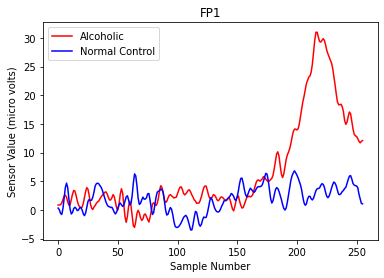

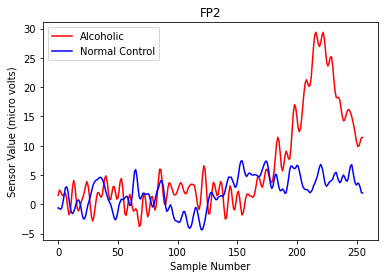

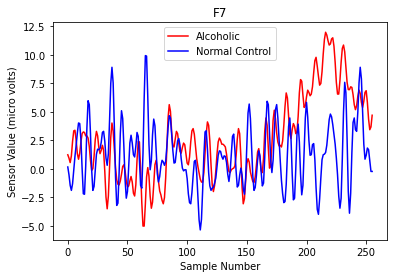

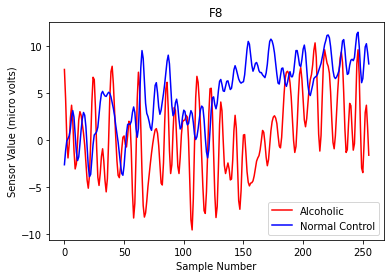

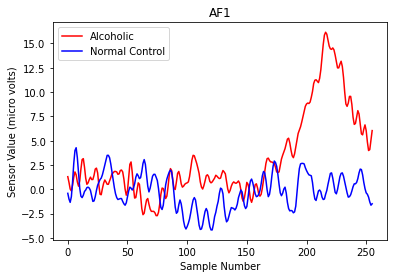

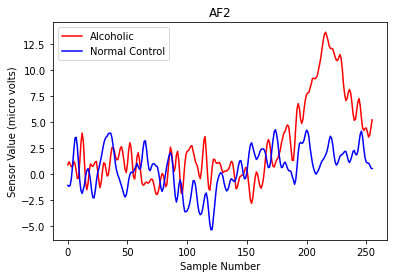

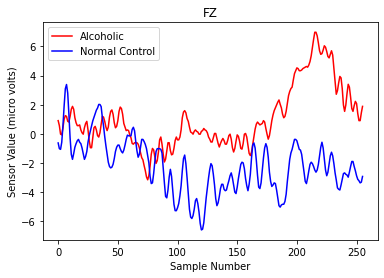

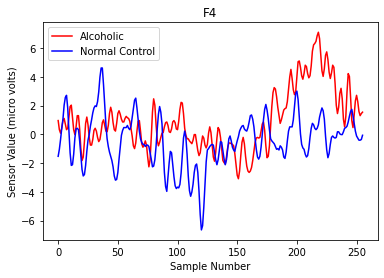

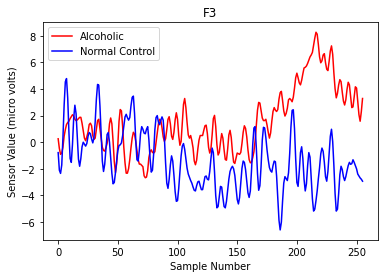

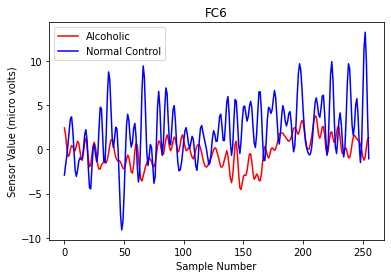

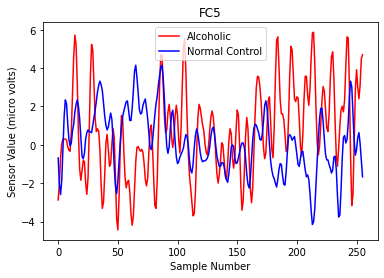

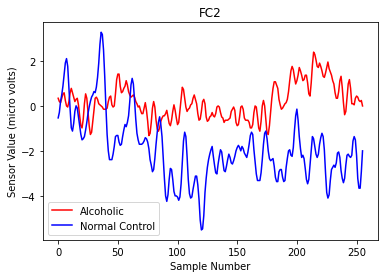

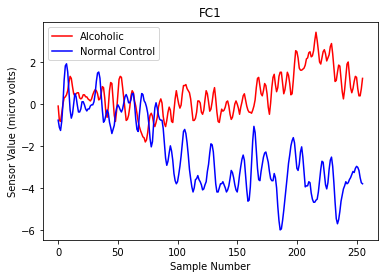

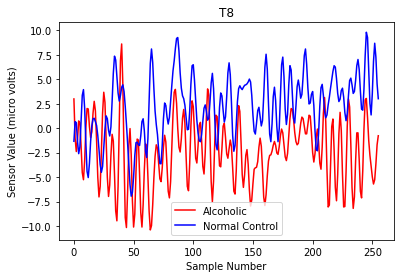

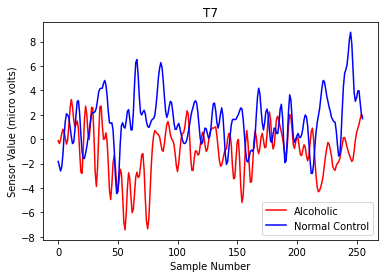

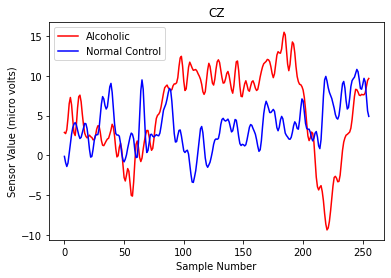

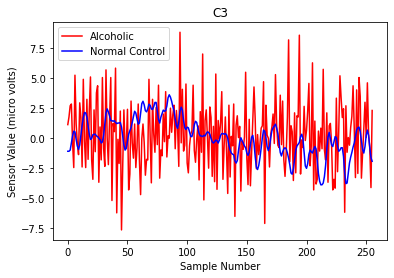

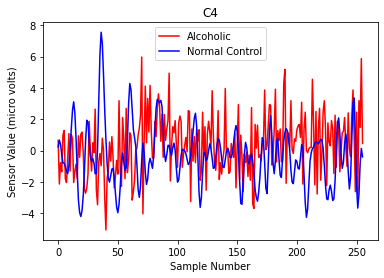

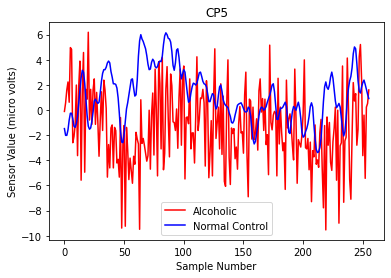

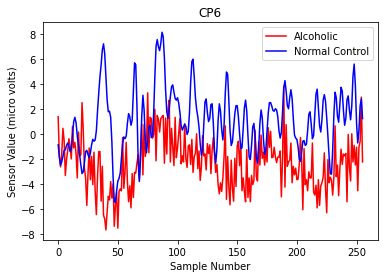

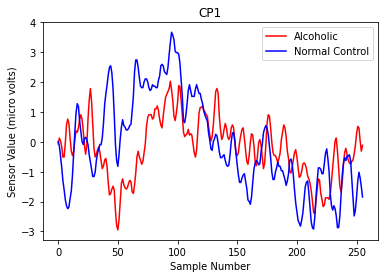

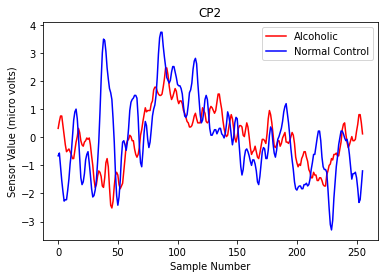

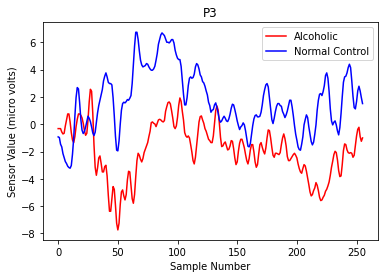

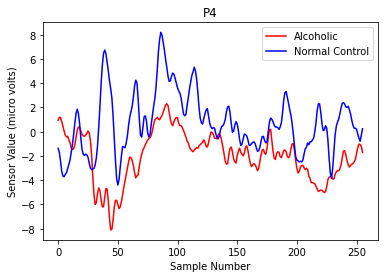

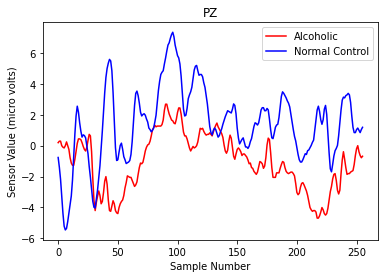

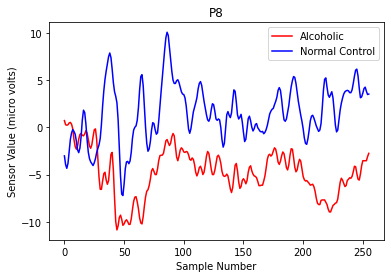

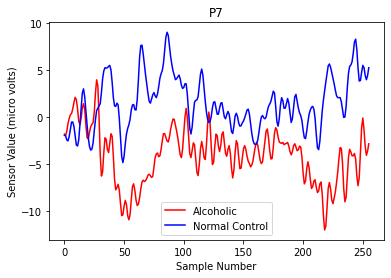

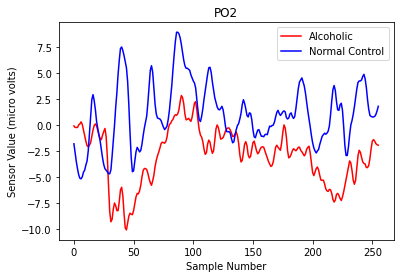

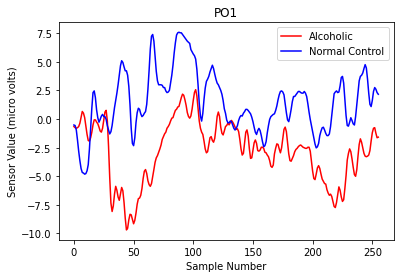

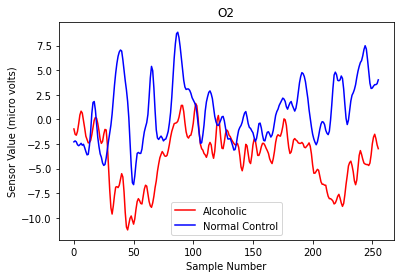

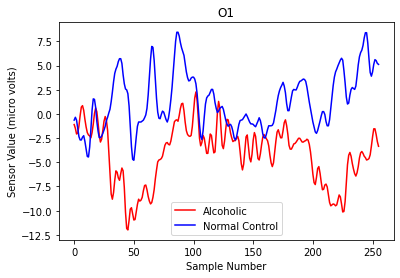

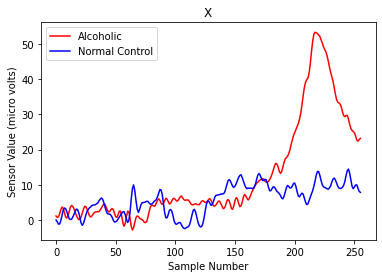

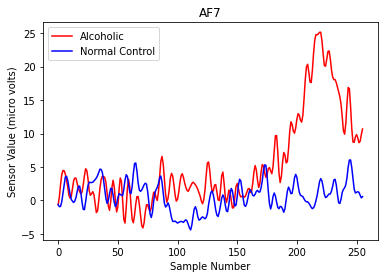

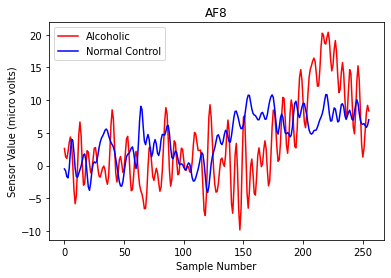

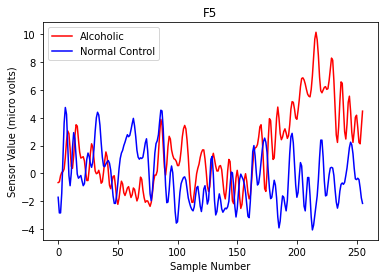

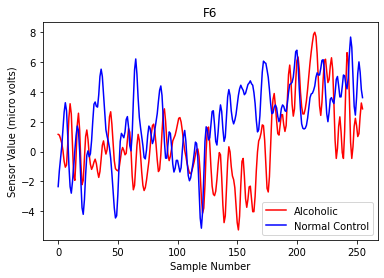

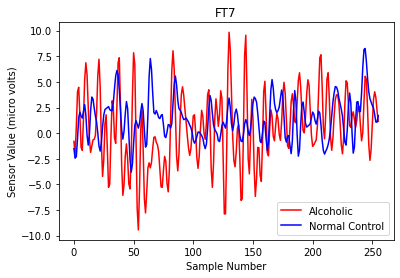

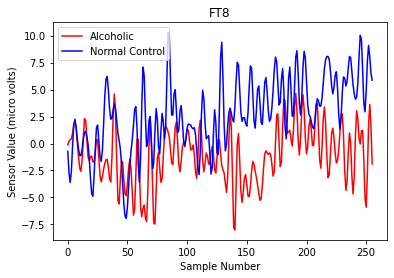

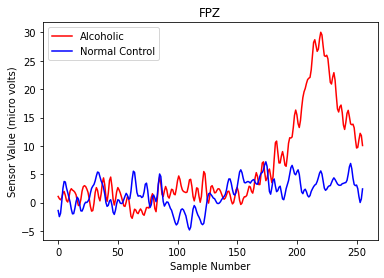

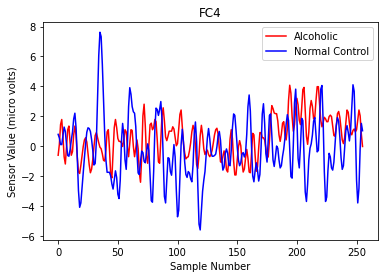

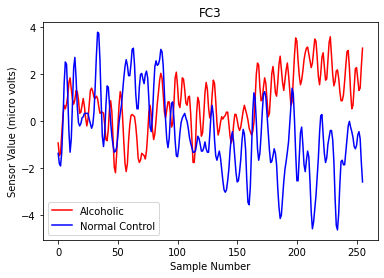

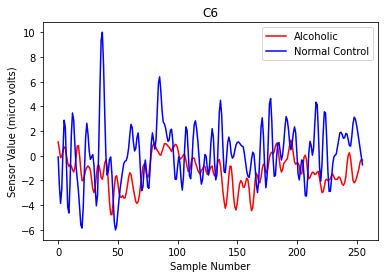

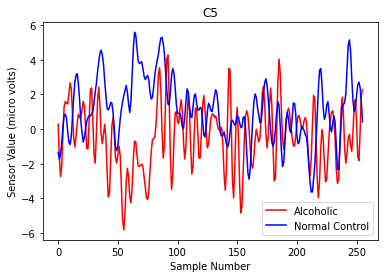

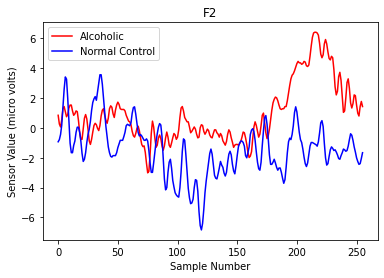

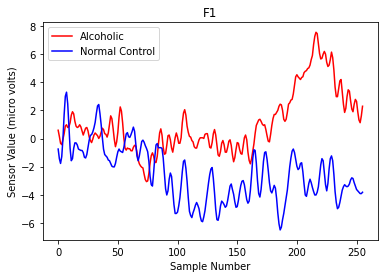

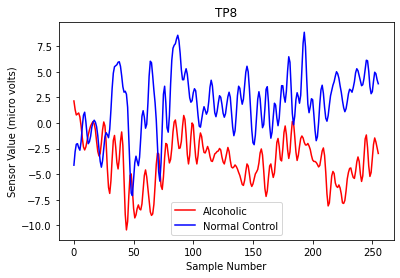

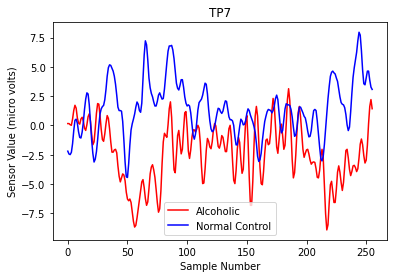

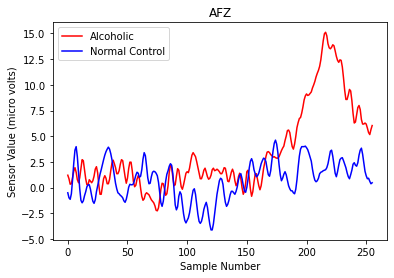

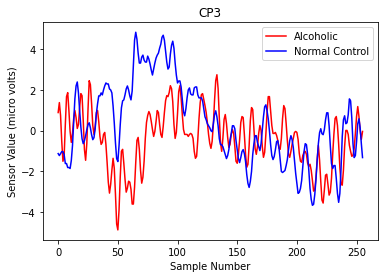

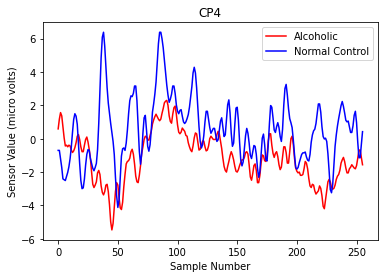

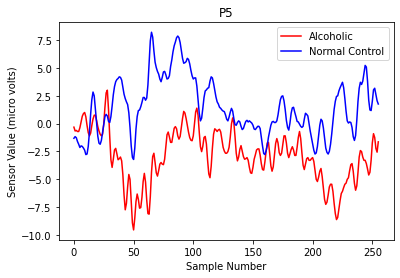

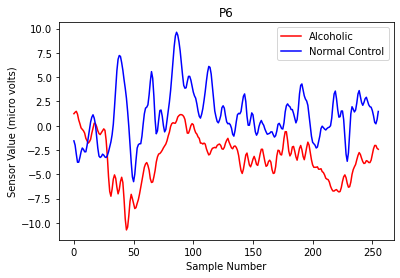

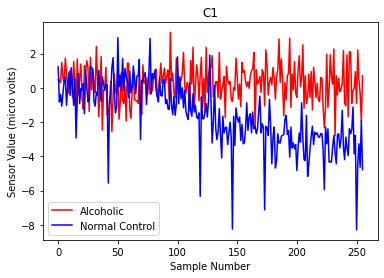

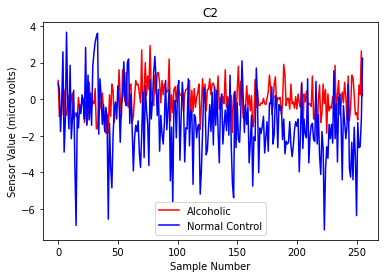

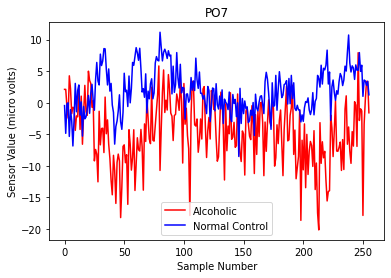

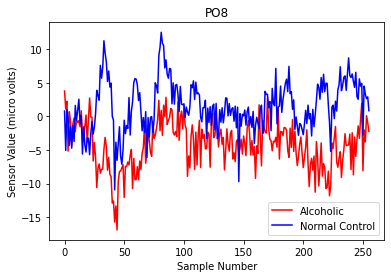

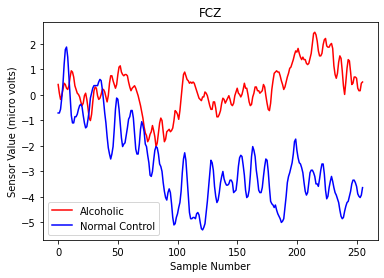

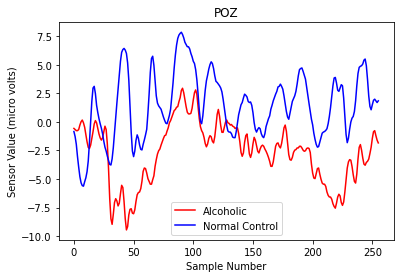

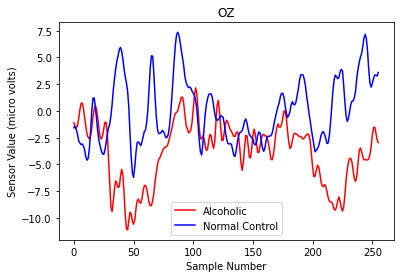

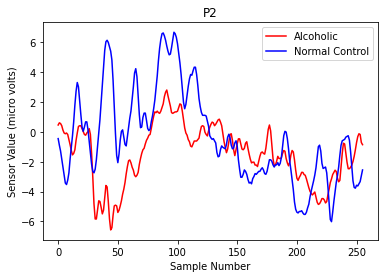

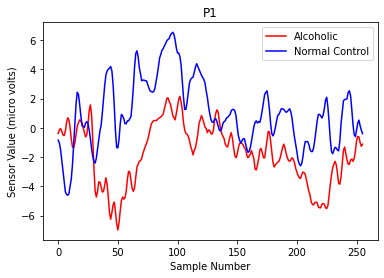

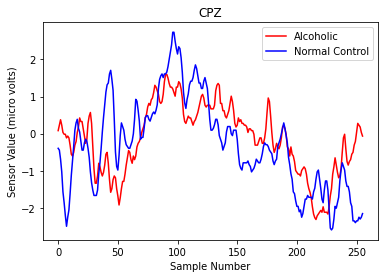

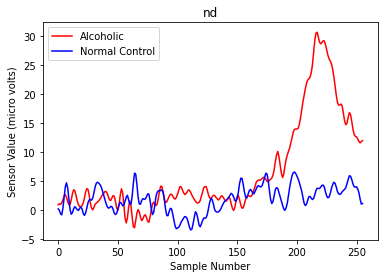

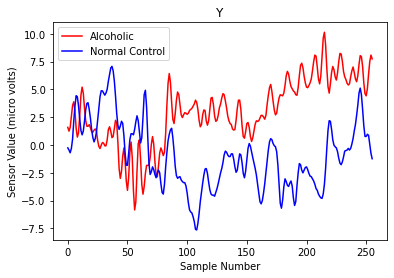

In [11]:
plot_a_and_c(a_avg, c_avg)

In [12]:
plt.close('all')

# Plotting the avg. EEG across all channels for each patient

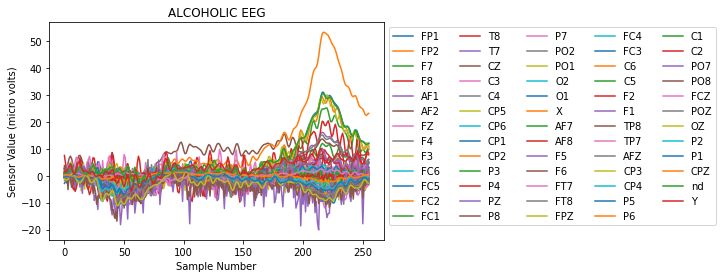

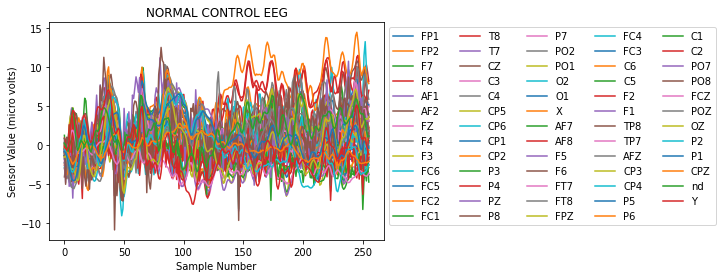

In [48]:
# {'FP1': [..256..], 'FP2': [...], 'Y': [...]}
plt.figure(0);
for a in a_avg:
    plt.plot(range(256), a_avg[a]);
plt.title('ALCOHOLIC EEG')
plt.xlabel('Sample Number')
plt.ylabel('Sensor Value (micro volts)')
#plt.legend(list(a_avg.keys()), loc='lower left', ncol=len(a_avg))
plt.legend(list(a_avg.keys()), ncol=5,bbox_to_anchor=(1.0, 1.0))


plt.figure(1);
for c in c_avg:
    plt.plot(range(256), c_avg[c]);
plt.title('NORMAL CONTROL EEG')
plt.xlabel('Sample Number')
plt.ylabel('Sensor Value (micro volts)')
plt.legend(list(c_avg.keys()), ncol=5,bbox_to_anchor=(1.0, 1.0))

In [32]:
plt.close('all')

# Plotting Avg. EEG for all channels for both patients

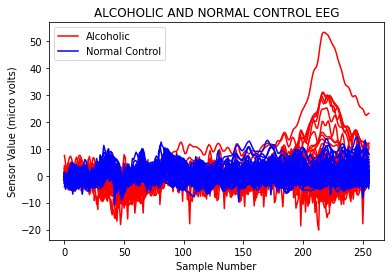

In [54]:
plt.figure(0);
for a in a_avg:
    plt.plot(range(256), a_avg[a], color='red');
for c in c_avg:
    plt.plot(range(256), c_avg[c], color='blue');
plt.title('ALCOHOLIC AND NORMAL CONTROL EEG')
plt.xlabel('Sample Number')
plt.ylabel('Sensor Value (micro volts)')
plt.legend(['Alcoholic', 'Normal Control']).legendHandles[1].set_color('blue')

In [55]:
plt.close('all')

# Plotting Avg. EEG for all channels in both patients (seperated channels)

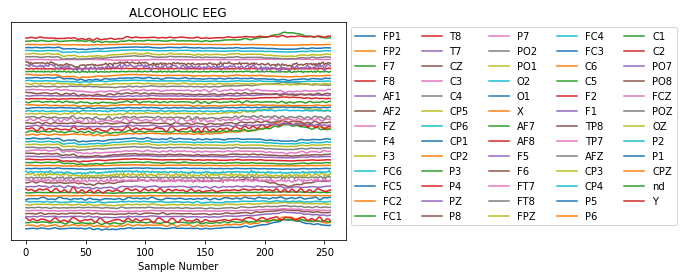

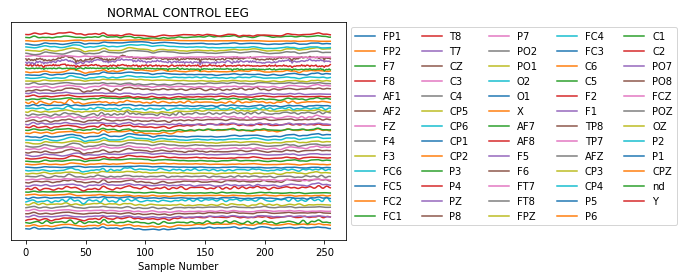

In [65]:
plt.figure(0);
x=0
for a in a_avg:
    plt.plot(range(256), [a_avg[a][i]+x for i in range(len(a_avg[a]))]);
    x+=10
plt.title('ALCOHOLIC EEG')
plt.yticks([])
plt.xlabel('Sample Number')
#plt.ylabel('Sensor Value (micro volts)')
#plt.legend(list(a_avg.keys()), loc='lower left', ncol=len(a_avg))
plt.legend(list(a_avg.keys()), ncol=5,bbox_to_anchor=(1.0, 1.0))


plt.figure(1);
x=0
for c in c_avg:
    plt.plot(range(256), [c_avg[c][i]+x for i in range(len(c_avg[c]))]);
    x+=10
plt.title('NORMAL CONTROL EEG')
plt.yticks([])
plt.xlabel('Sample Number')
#plt.ylabel('Sensor Value (micro volts)')
#plt.legend(list(a_avg.keys()), loc='lower left', ncol=len(a_avg))
plt.legend(list(a_avg.keys()), ncol=5,bbox_to_anchor=(1.0, 1.0))

In [66]:
plt.close('all')

# 3-D Plots for each patient

In [112]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [72]:
import numpy as np

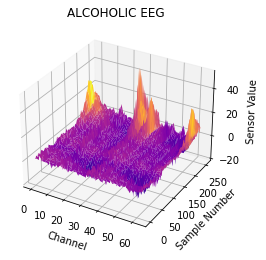

In [124]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# {'FP1': [..256..], 'FP2': [...], 'Y': [...]}
x = np.arange(64)
y = np.arange(256)
z = np.array(list(a_avg.values()))

xx, yy = np.meshgrid(x, y)

ax.plot_surface(xx, yy, np.transpose(z), cmap='plasma')

ax.set_title('ALCOHOLIC EEG')
ax.set_xlabel('Channel')
ax.set_ylabel('Sample Number')
ax.set_zlabel('Sensor Value')

plt.show()

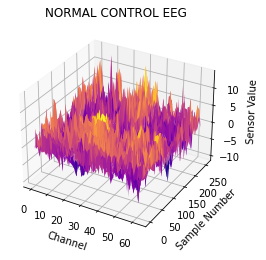

In [128]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# {'FP1': [..256..], 'FP2': [...], 'Y': [...]}
x = np.arange(64)
y = np.arange(256)
z = np.array(list(c_avg.values()))

xx, yy = np.meshgrid(x, y)

ax.plot_surface(xx, yy, np.transpose(z), cmap='plasma')

ax.set_title('NORMAL CONTROL EEG')
ax.set_xlabel('Channel')
ax.set_ylabel('Sample Number')
ax.set_zlabel('Sensor Value')

plt.show()